In [69]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

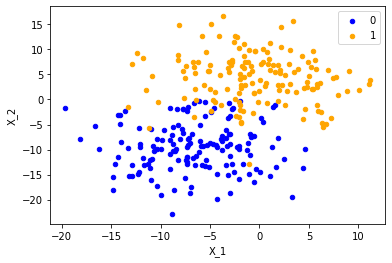

In [70]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [71]:
def next_batch(X, Y, batch_size):
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], Y[i:i + batch_size])

In [72]:
X = np.c_[np.ones((X.shape[0])), X]

In [42]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def hx(W,X):
    return sigmoid(np.dot(X,W))

In [11]:
def cost(W, X, Y):
    y_pred = hx(W,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

In [83]:
def grad(W, X, Y):
    y_pred = hx(W,X)
    print("y_pred", y_pred)
    A = (Y*(1-y_pred) - (1-Y)*y_pred)
    g = -1* np.dot(A.T,X)
    return g

In [84]:

def sgd(W_new, W_prev, lr, batch_size, epochs):
    X_, Y_ = shuffle(X, Y, random_state=0)
    
    for e in range(epochs):
        epoch_loss = []
        X_, Y_ = shuffle(X_, Y_, random_state=0)
        for (batchX, batchY) in next_batch(X_, Y_, batch_size):
            W_prev = W_new

            print("W_prev",W_prev)            
#             print("W_prev",W_prev)
            print("X_" ,X_.shape)
            print("batchX",batchX.shape)
            print(batchX)
            print("batchY",batchY.shape)
            print(batchY)
            gradients = grad(W_prev, batchX, batchY)
            
            print(gradients)
            return
            
#             epoch_loss.append(cost(W_prev, batchX, batchY))
            gradients = grad(W_prev, batchX, batchY)
            W_new = W_prev - lr*gradients
#         print(np.average(epoch_loss))
    return W_new

In [85]:
W = np.random.uniform(size=(X.shape[1],))
W.shape
W = sgd(W, W, .009, 9, 200)

W_prev [0.69045541 0.07982177 0.53727197]
X_ (300, 3)
batchX (9, 3)
[[  1.          -1.88829542   2.3302919 ]
 [  1.         -10.96460974  -5.96349171]
 [  1.          -1.58463113   8.70549127]
 [  1.          -2.03970938  10.26146912]
 [  1.         -12.09363448  -8.90147072]
 [  1.          -9.61657531  -6.11479099]
 [  1.           0.07079001   3.8711527 ]
 [  1.           4.43950205  -3.82210746]
 [  1.          -4.74506482  -0.06890418]]
batchY (9,)
[1 0 1 1 0 0 1 1 1]
y_pred [0.85713911 0.03264809 0.99473389 0.99762609 0.00632192 0.03348943
 0.94136327 0.26723691 0.56824041]
[-1.30120088 -1.68205852  1.74459438]


In [19]:
print(W)
W = sgd(W, W, .009, 32, 200)
print(W)

[2.38150163 0.22263095 0.53666717]
X_ [[  1.          -8.51675035 -10.27504467]
 [  1.          -5.54007908 -13.25676735]
 [  1.          -2.73324945 -12.82337213]
 [  1.           2.53798849  -1.10801658]
 [  1.          -5.74645616  -9.32479945]
 [  1.          -6.63448175  -3.46933592]
 [  1.           7.19789277  -3.67129432]
 [  1.          -5.43166058 -12.09166672]
 [  1.         -11.79557535 -11.77078326]
 [  1.          -7.77343895  -1.93480599]
 [  1.           1.06020971   5.97983405]
 [  1.          -1.93867029  -2.16481464]
 [  1.          -1.58463113   8.70549127]
 [  1.           1.59564328  -1.09188605]
 [  1.          -9.92167635  -9.84665804]
 [  1.           5.87607933  -2.31204892]
 [  1.         -14.28207777  -3.05577697]
 [  1.          -2.10597408  -0.45045934]
 [  1.           0.06176742 -14.43151944]
 [  1.           2.13657619  10.40980472]
 [  1.           5.38480917   2.18150008]
 [  1.          -0.45933837   9.59001531]
 [  1.         -14.58986436 -12.847008

5.327574140095255
5.019070435732433
5.0239906066737365
5.02668566473822
5.159831147350916
5.027851035149408
4.988743345478278
5.012851289608989
5.081578294066496
5.272216591416446
4.8519508533255
4.956927038551942
5.025184851406534
4.993740869028208
5.099924900034982
5.09612000269632
5.236945208720019
4.903703284869676
5.07584916940856
4.7017472280056065
5.29908119542805
5.112235559652279
5.057224320615737
5.213674075045622
5.119812392599822
4.92811146931095
4.991995531456666
4.99485383522539
5.049362544036651
4.9427449800062835
4.919145212299382
5.43140262880827
5.116162625530547
4.962611152033845
5.042173405467414
5.157818066582347
5.048985282033915
5.019007122943697
5.185027600824268
5.032482503175793
4.897131525263214
4.954229046971193
5.258994247151351
5.18271961676983
4.884847107098248
5.15686154007832
5.047648617485101
5.050130442172929
4.869818701081385
4.99571992340218
5.022993438108186
5.002852761726189
4.881315172498818
5.055597526442867
5.015678055503253
5.013398993761847
4

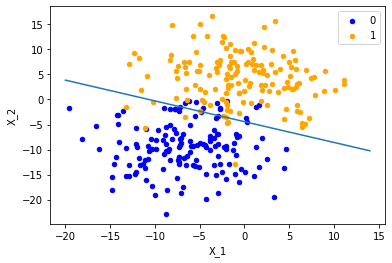

In [17]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-W[0]-W[1]*x)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()